### Step 1: Data Preprocessing
### Step 2: Applying the algorithm
### Step 3: Finding the Accuracy, Sensitivity, Specificity on Training data and Testing data
### Step 4: Trying with Cross-Validation - k-fold

# Libraries

In [1]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
import matplotlib.pyplot as plt
%matplotlib inline
#test the effectiveness of a machine learning models using k-fold cross validation
from sklearn.model_selection import StratifiedKFold
#Calcuting the cross_val score
from sklearn.model_selection import cross_val_score
#Using the algorithm i.e Gaussian (It is specially used when the features have continuous values.)
from sklearn.naive_bayes import GaussianNB
#Getting the summary in tabular format
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

#Reading CSV File

In [29]:
#Uploading the file
file = files.upload() 
#Reading the csv File
Traindata = pd.read_csv("data1.csv") 
#Printing the top 5 rows from dataframe
Traindata.head()

Saving data1.csv to data1 (1).csv


,Exam 1,Exam 2,Admitted
0,34.6237,78.0247,0
1,30.2867,43.8950,0
2,35.8474,72.9022,0
3,45.0833,56.3164,0
4,95.8616,38.2253,0


In [30]:
#Getting the columns names from dataset
Traindata.columns

Index(['Exam 1', 'Exam 2', 'Admitted'], dtype='object')

In [31]:
#Getting information like data type
Traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam 1    80 non-null     float64
 1   Exam 2    80 non-null     float64
 2   Admitted  80 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.0 KB


In [32]:
#Giving the statistical information
Traindata.describe()

,Exam 1,Exam 2,Admitted
count,80.000000,80.000000,80.000000
mean,65.825728,66.990266,0.625000
std,19.103991,18.374108,0.487177
min,30.286700,30.603300,0.000000
25%,51.422725,49.567325,0.000000
50%,67.345650,69.202650,1.000000
75%,80.006150,79.067225,1.000000
max,99.827900,98.869400,1.000000


In [6]:
#Finding the missing value
Traindata.isnull().sum()

Exam 1      0
Exam 2      0
Admitted    0
dtype: int64

Let's create a scatter plot of the two scores and use color coding to visualize if the example is positive (admitted) or negative (not admitted).

Text(0.5, 1.0, 'Addmission based on Exam scores')

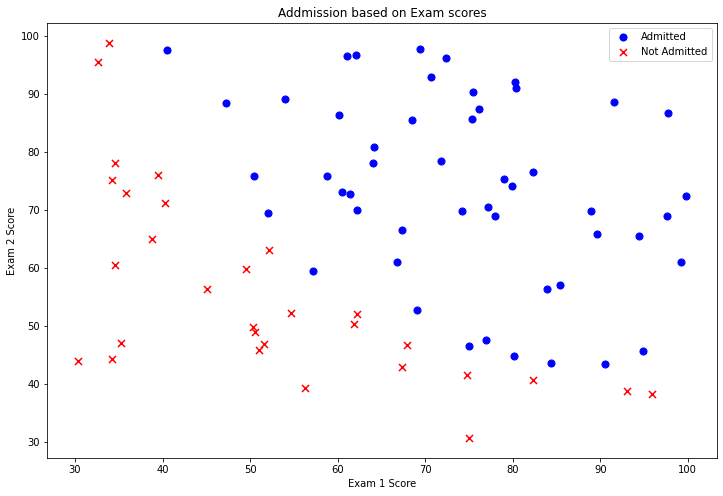

In [7]:
#Creating the variable for getting admitted or not admitted
positive = Traindata[Traindata['Admitted'].isin([1])]
negative = Traindata[Traindata['Admitted'].isin([0])]
#Creating the subplot
fig, ax = plt.subplots(figsize=(12,8))
#Creating the scatter plot
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.set_title('Addmission based on Exam scores')

It looks like there is a clear decision boundary between the two classes

In [33]:
#upload file into google colab session
file = files.upload()  
#Reading the csv File
Testdata = pd.read_csv("data2.csv") 
#Printing the top 5 rows from dataframe
Testdata.head()

Saving data2.csv to data2 (1).csv


,Exam 1,Exam 2,Admitted
0,30.0588,49.5930,0
1,44.6683,66.4501,0
2,66.5609,41.0921,0
3,49.0726,51.8832,0
4,32.7228,43.3072,0


In [34]:
#Getting the columns names from dataset
Testdata.columns

Index(['Exam 1', 'Exam 2', 'Admitted'], dtype='object')

In [35]:
#Getting information like data type
Testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam 1    20 non-null     float64
 1   Exam 2    20 non-null     float64
 2   Admitted  20 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


In [36]:
#Giving the statistical information
Testdata.describe()

,Exam 1,Exam 2,Admitted
count,20.000000,20.000000,20.000000
mean,62.292060,62.898735,0.500000
std,19.872872,18.264811,0.512989
min,30.058800,35.570700,0.000000
25%,48.620525,45.097525,0.000000
50%,58.847150,63.609800,0.500000
75%,76.699975,76.568625,1.000000
max,99.827900,90.960100,1.000000


In [12]:
#Finding the missing value
Testdata.isnull().sum()

Exam 1      0
Exam 2      0
Admitted    0
dtype: int64

#Applying the Algorithm

In [13]:
#Creating variable i.e. y_train and keeping only Admitted column in train dataframe
y_train = Traindata['Admitted']
#Creating variable i.e. y_train and keeping only Admitted column in test dataframe
y_test = Testdata['Admitted']

In [14]:
#Creating variable i.e Traindata and dropping the admitted columns because admitted columns is used for prediction
Traindata = Traindata.drop('Admitted',axis=1)
#Creating variable i.e Testdata and dropping the admitted columns because admitted columns is used for prediction
Testdata = Testdata.drop('Admitted',axis=1)

In [15]:
#Create a gaussian naive bayes classifier object
gnb = GaussianNB()
#Fit train data to the classifier
gnb.fit(Traindata, y_train)
#Making predictions on the training set
x_pred = gnb.predict(Traindata)
#comparing actual response values (y_train with predicted response values (x_pred)
print("Gaussian Naive Bayes model accuracy(in %) for Training:", metrics.accuracy_score(y_train, x_pred)*100)
#Making predictions on the testing set
y_pred = gnb.predict(Testdata)
#comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %) for Testing:", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %) for Training: 93.75
Gaussian Naive Bayes model accuracy(in %) for Testing: 90.0


In [16]:
#Confusion Matrix is the number of correct and incorrect predictions made by a classifier
print('confusion marix :')
print(confusion_matrix(y_test,y_pred))
print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))

confusion marix :
[[9 1]
 [1 9]]


Confusion matrix using Crosstab :
Prediction   0   1  All
Actual                 
0            9   1   10
1            1   9   10
All         10  10   20


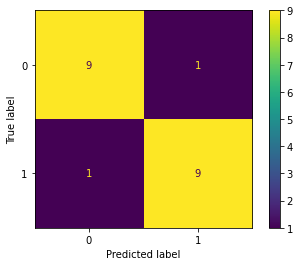

In [17]:
#Graphical Represtation of confusion Matrix
plot_confusion_matrix(gnb, Testdata, y_test)

Two of the results are incorrectly predicted and 18 results are predicted correctly.

## Finding the Accuracy, Sensitivity, Specificity on Training data and Testing data

In [18]:
#Accuracy,Sensitivity,Specificity on Training Data

#Creating the Confusion Matrix
cm = confusion_matrix(y_train,x_pred)
total=sum(sum(cm))

#Calculating the accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

#Calculating the sensitivity
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

#Calculating the specificity
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9375
Sensitivity :  0.9
Specificity :  0.96


In [19]:
#Accuracy,Sensitivity,Specificity on Testing Data

#Creating the Confusion Matrix
cm1= confusion_matrix(y_test,y_pred)
total1=sum(sum(cm1))

#Calculating the accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

#Calculating the sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1)

#Calculating the specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9
Sensitivity :  0.9
Specificity :  0.9


# Trying with Cross-Validation - k-fold

In [28]:
#Split dataset into k consecutive folds (without shuffling by default)

#Creating the variable num_folds for how many no. of folds
num_folds=10
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits=num_folds)
#Printing the results
results=cross_val_score(gnb,Traindata,y_train,cv=kfold)
print("CV-Accuracy:" ,results.mean()*100)

CV-Accuracy: 90.0


In [22]:
#Getting Roc Socre 
print(roc_auc_score(y_test,y_pred))

0.9
